**Transforming NAD 27 Datum on WGS 84** 

In [1]:
import pyproj

# Create a Proj object for the NAD 27 coordinate system
nad27 = pyproj.Proj(init='epsg:4267')

# Create a Proj object for the WGS 84 coordinate system
wgs84 = pyproj.Proj(init='epsg:4326')

# Transform the datum point of NAD 27 to WGS 84
datum_point_nad27 = (0, 0)
datum_point_wgs84 = pyproj.transform(nad27, wgs84, *datum_point_nad27)

print(datum_point_wgs84)

(0.0, 0.0)


G:\WorkData\Programming\Python\GIS Data Science\workspace\gis-env\lib\site-packages\pyproj\crs\crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
G:\WorkData\Programming\Python\GIS Data Science\workspace\gis-env\lib\site-packages\pyproj\crs\crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\manis\AppData\Local\Temp\ipykernel_17944\365476425.py:11: FutureWarning: This function is deprecated. See: https://pyproj4.github

**Creating a Custom Formatter class**

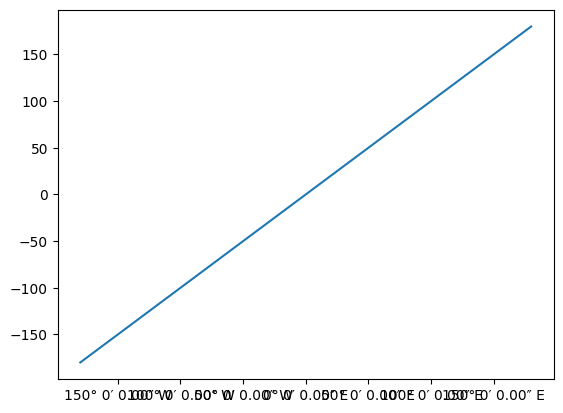

In [2]:
import matplotlib.ticker as mticker

class CustomLongitudeFormatter(mticker.Formatter):
    def __init__(self, degree_symbol='°', minute_symbol='′', second_symbol='″', decimal_places=2):
        self.degree_symbol = degree_symbol
        self.minute_symbol = minute_symbol
        self.second_symbol = second_symbol
        self.decimal_places = decimal_places

    def __call__(self, value, pos=None):
        # Determine the direction (E or W)
        direction = 'E' if value >= 0 else 'W'
        value = abs(value)

        # Convert to degrees, minutes, and seconds
        degrees = int(value)
        minutes = int((value - degrees) * 60)
        seconds = round((value - degrees - minutes / 60) * 3600, self.decimal_places)

        # Format the string
        formatted_string = f"{degrees}{self.degree_symbol} {minutes}{self.minute_symbol} {seconds:.{self.decimal_places}f}{self.second_symbol} {direction}"
        return formatted_string

# Example usage
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(range(-180, 181, 30), range(-180, 181, 30))

# Set the custom formatter for the x-axis
ax.xaxis.set_major_formatter(CustomLongitudeFormatter())

plt.show()


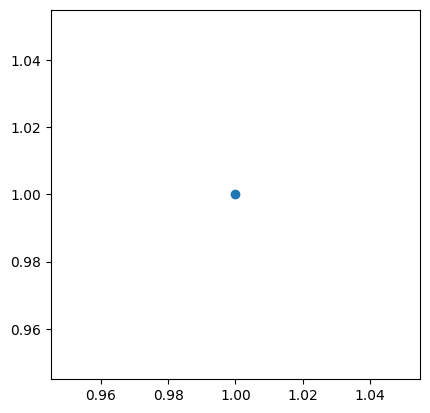

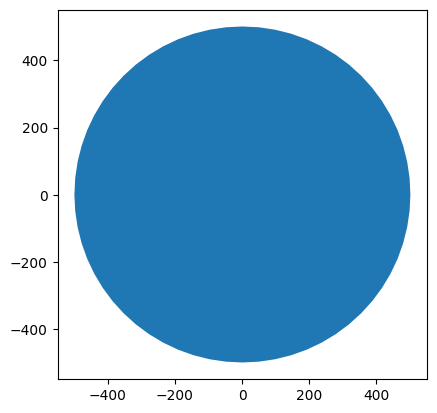

In [8]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Create a GeoDataFrame with a point
gdf = gpd.GeoDataFrame({'geometry': [Point(1, 1)]}, crs="EPSG:32611")

# Create a buffer of 1 degree around the point
gdf['buffer'] = gdf.buffer(500)

# Plot the original point and the buffer
gdf.plot()
gdf["buffer"].plot()
plt.show()


In [6]:
gdf

,geometry,buffer
0,POINT (1 1),"POLYGON ((501 1, 498.592 -48.009, 491.393 -96...."
